In [59]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [60]:
charts = pd.read_csv('../../data/songs.csv')
charts

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,'Til You Can't,Cody Johnson,0.501,0.815,1.0,1.0,-4.865,0.0436,0.05130,0.000000,0.1060,0.4600,160.087,224213.0
1,'Till I Collapse,"Eminem, Nate Dogg",0.548,0.847,1.0,1.0,-3.237,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,297787.0
2,(Don't Fear) The Reaper,Blue Öyster Cult,0.333,0.927,9.0,0.0,-8.550,0.0733,0.00290,0.000208,0.2970,0.3850,141.466,308120.0
3,(Everybody's Waitin' For) The Man With The Bag...,Kay Starr,0.739,0.317,0.0,1.0,-8.668,0.0905,0.39100,0.004870,0.2430,0.8060,71.165,162373.0
4,(There's No Place Like) Home for the Holidays ...,Perry Como,0.478,0.341,5.0,1.0,-12.556,0.0511,0.89700,0.000000,0.2580,0.4740,143.736,175893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,you broke me first,Tate McRae,0.667,0.373,4.0,1.0,-9.389,0.0500,0.78500,0.000000,0.0906,0.0823,124.148,169266.0
2550,¿Por Qué Me Haces Llorar?,Juan Gabriel,0.647,0.477,0.0,1.0,-8.157,0.0342,0.03740,0.000010,0.1270,0.7930,112.041,182880.0
2551,¿Quién Te Crees?,"MC Davo, Calibre 50",0.747,0.780,9.0,0.0,-5.302,0.2160,0.05830,0.000000,0.1640,0.5380,82.524,185493.0
2552,Éxtasis,"Millonario & W. Corona, Cartel De Santa",0.937,0.791,0.0,1.0,-5.242,0.0871,0.02050,0.000232,0.0433,0.9740,119.967,289013.0


Data Exploration

(<AxesSubplot: ylabel='Frequency'>,
 count    2554.000000
 mean        0.667982
 std         0.147678
 min         0.150000
 25%         0.573000
 50%         0.681500
 75%         0.781000
 max         0.980000
 Name: danceability, dtype: float64)

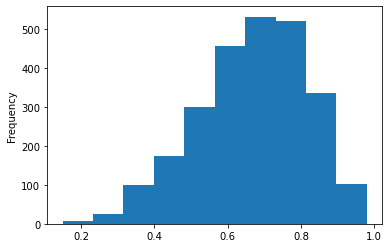

In [61]:
charts['danceability'].plot(kind='hist'), charts['danceability'].describe()

(<AxesSubplot: ylabel='Frequency'>,
 count    2554.000000
 mean        0.612003
 std         0.169731
 min         0.021800
 25%         0.507250
 50%         0.626500
 75%         0.732750
 max         0.973000
 Name: energy, dtype: float64)

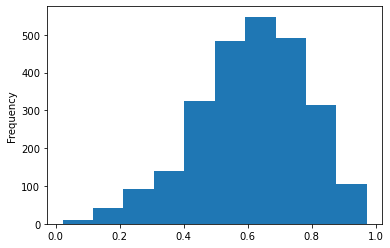

In [62]:
charts['energy'].plot(kind='hist'), charts['energy'].describe()

(<AxesSubplot: ylabel='Frequency'>,
 count    2554.000000
 mean       -6.738406
 std         2.650015
 min       -31.160000
 25%        -7.978250
 50%        -6.332000
 75%        -4.914000
 max        -0.515000
 Name: loudness, dtype: float64)

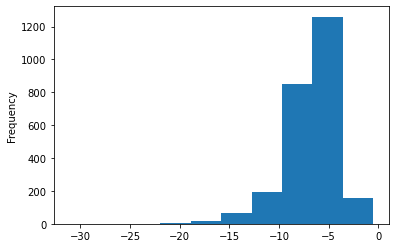

In [63]:
charts['loudness'].plot(kind='hist'), charts['loudness'].describe()

(<AxesSubplot: ylabel='Frequency'>,
 count    2554.000000
 mean        0.520207
 std         0.231527
 min         0.032000
 25%         0.338000
 50%         0.525000
 75%         0.700750
 max         0.978000
 Name: valence, dtype: float64)

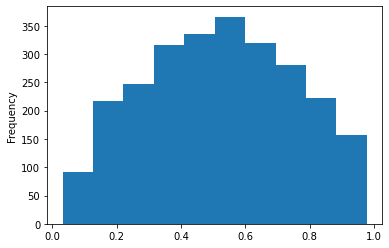

In [64]:
charts['valence'].plot(kind='hist'), charts['valence'].describe()

In [66]:
def get_vibe(df):
    """ 
    Categorizes each song into a vibe based on specific thresholds/criteria
    
    features:
    - danceability [0, 1]
    - energy [0, 1]
    - loudness [-60, 0]
    - valence [0, 1]

    vibes:
    - Chill
    - Hype
    - Relax
    - Other
    
    """
    return df

In [65]:
def return_tempo(tempo):
    if tempo < 60:
        return 0
    elif tempo < 90:
        return 1
    elif tempo < 110:
        return 2
    elif tempo < 120:
        return 3
    elif tempo < 160:
        return 4
    elif tempo < 180:
        return 5
    else:
        return 6
        
charts = charts.assign(tempo_name = charts['tempo'].apply(return_tempo))

In [67]:
# define our features
features_array = np.array(charts.columns)
features = np.delete(features_array, [0, 1])
features

array(['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'tempo_name'], dtype=object)

Spotify's Descriptions of the Default Features:
* [Click Here](developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

In [68]:
# Clean and Scale Data

# convert milliseconds to minutes
charts = charts.assign(duration_min = charts['duration'] / 60000).drop(columns=['duration'])

# feature scaling
scaler = MinMaxScaler()
scaler.fit(np.array(charts[['tempo', 'loudness', 'duration_min']]))
charts[['tempo', 'loudness', 'duration_min']] = scaler.transform(np.array(charts[['tempo', 'loudness', 'duration_min']]))

# Scaled!
charts


,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tempo_name,duration_min
0,'Til You Can't,Cody Johnson,0.501,0.815,1.0,1.0,0.858052,0.0436,0.05130,0.000000,0.1060,0.4600,0.710372,5,0.286447
1,'Till I Collapse,"Eminem, Nate Dogg",0.548,0.847,1.0,1.0,0.911176,0.1860,0.06220,0.000000,0.0816,0.1000,0.777751,5,0.398980
2,(Don't Fear) The Reaper,Blue Öyster Cult,0.333,0.927,9.0,0.0,0.737804,0.0733,0.00290,0.000208,0.2970,0.3850,0.599926,4,0.414785
3,(Everybody's Waitin' For) The Man With The Bag...,Kay Starr,0.739,0.317,0.0,1.0,0.733953,0.0905,0.39100,0.004870,0.2430,0.8060,0.182955,1,0.191861
4,(There's No Place Like) Home for the Holidays ...,Perry Como,0.478,0.341,5.0,1.0,0.607081,0.0511,0.89700,0.000000,0.2580,0.4740,0.613390,4,0.212540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,you broke me first,Tate McRae,0.667,0.373,4.0,1.0,0.710426,0.0500,0.78500,0.000000,0.0906,0.0823,0.497209,4,0.202404
2550,¿Por Qué Me Haces Llorar?,Juan Gabriel,0.647,0.477,0.0,1.0,0.750628,0.0342,0.03740,0.000010,0.1270,0.7930,0.425400,3,0.223227
2551,¿Quién Te Crees?,"MC Davo, Calibre 50",0.747,0.780,9.0,0.0,0.843792,0.2160,0.05830,0.000000,0.1640,0.5380,0.250328,1,0.227223
2552,Éxtasis,"Millonario & W. Corona, Cartel De Santa",0.937,0.791,0.0,1.0,0.845750,0.0871,0.02050,0.000232,0.0433,0.9740,0.472411,3,0.385560
